# data cleaning and preparing for analysis

In [3]:
import pandas as pd 
import gc
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [4]:
# read in data 
df=pd.read_csv('O.C.Tanner Data Challenge.csv')

c:\program files\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.shape                     # check the dimension of the data 

(10005000, 27)

In [6]:
df.columns                   

Index(['Unnamed: 0', 'giver_user_key', 'giver_manager_user_key',
       'giver_gender', 'giver_employee_id', 'giver_city', 'giver_status',
       'giver_effective_date', 'recognition_type_key', 'transaction_date_key',
       'recognition_points', 'recognition_access_code_value', 'program_name',
       'program_type', 'receiver_user_key', 'receiver_business_unit_key',
       'receiver_manager_user_key', 'receiver_gender', 'receiver_employee_id',
       'receiver_city', 'receiver_effective_date', 'giver_business_unit_name',
       'giver_parent_business_unit_name', 'receiver_business_unit_name',
       'receiver_parent_business_unit_name', 'corporate_value',
       'recognition_points_US$'],
      dtype='object')

In [7]:
df.dtypes                  # check data types

Unnamed: 0                              int64
giver_user_key                          int64
giver_manager_user_key                  int64
giver_gender                           object
giver_employee_id                      object
giver_city                              int64
giver_status                           object
giver_effective_date                    int64
recognition_type_key                    int64
transaction_date_key                    int64
recognition_points                      int64
recognition_access_code_value           int64
program_name                            int64
program_type                            int64
receiver_user_key                       int64
receiver_business_unit_key              int64
receiver_manager_user_key               int64
receiver_gender                        object
receiver_employee_id                   object
receiver_city                           int64
receiver_effective_date               float64
giver_business_unit_name          

In [8]:
df.head(5)                 # check the data 
                           # and data is sorted 

,Unnamed: 0,giver_user_key,giver_manager_user_key,giver_gender,giver_employee_id,giver_city,giver_status,giver_effective_date,recognition_type_key,transaction_date_key,...,receiver_gender,receiver_employee_id,receiver_city,receiver_effective_date,giver_business_unit_name,giver_parent_business_unit_name,receiver_business_unit_name,receiver_parent_business_unit_name,corporate_value,recognition_points_US$
0,0,33850,2880639,F,101117,1097243101891792525,ACTIVE,20120516,4,20150722,...,M,105606,9076182381583229428,20141202.0,2462746391955500153,2322805613083524948,4336470076354379502,2322805613083524948,-3753146870484951856,2.5
1,1,33850,2880639,F,101117,1097243101891792525,ACTIVE,20120516,4,20140813,...,M,105606,9076182381583229428,20141202.0,2462746391955500153,2322805613083524948,4336470076354379502,2322805613083524948,-3753146870484951856,2.5
2,2,33850,2880639,F,101117,1097243101891792525,ACTIVE,20120516,4,20150403,...,M,105606,9076182381583229428,20141202.0,2462746391955500153,2322805613083524948,4336470076354379502,2322805613083524948,2531263997777166587,2.5
3,3,33850,2880639,F,101117,1097243101891792525,ACTIVE,20120516,4,20150210,...,M,105606,9076182381583229428,20141202.0,2462746391955500153,2322805613083524948,4336470076354379502,2322805613083524948,-3753146870484951856,2.5
4,4,33850,2880639,F,101117,1097243101891792525,ACTIVE,20120516,4,20151110,...,M,105606,9076182381583229428,20141202.0,2462746391955500153,2322805613083524948,4336470076354379502,2322805613083524948,-3753146870484951856,5.0


# data is made of 26 columns (excluding index). My step to analysis data:
### 1, check data type, data range, if there is missing/unreasonable data;
### 2, check the Hypothesis  below
# Objective: build model of using all data feature (excluding "recognition_points") to predict "recognition_point_US"
# Hypothesis
### 1, Based on name of each column, I assume: "giver" and "receiver" should be considered as pair of data for analysis;
### 2,The "recognition_point" and "recognition_points_US\$" might be related 
### 3, check relationship of "recognition_point_US" and time data

In [9]:
df.isnull().any()            # check if there is any missing value 

Unnamed: 0                            False
giver_user_key                        False
giver_manager_user_key                False
giver_gender                           True
giver_employee_id                     False
giver_city                            False
giver_status                          False
giver_effective_date                  False
recognition_type_key                  False
transaction_date_key                  False
recognition_points                    False
recognition_access_code_value         False
program_name                          False
program_type                          False
receiver_user_key                     False
receiver_business_unit_key            False
receiver_manager_user_key             False
receiver_gender                        True
receiver_employee_id                   True
receiver_city                         False
receiver_effective_date                True
giver_business_unit_name              False
giver_parent_business_unit_name 

In [10]:
# Check value

df['giver_gender'].value_counts()  # there is 1 nan value and 12 "-9999"

F        6498383
M        3134161
F|            54
-9999         46
M|            25
nan|           1
'F             1
Name: giver_gender, dtype: int64

In [11]:
 # The "F|" and "M|" should be typo, correct as 'F'  and 'M'
df['giver_gender']=df['giver_gender'].replace(to_replace='F|',value='F')
df['giver_gender']=df['giver_gender'].replace(to_replace='M|',value='M')
df['giver_gender']=df['giver_gender'].replace(to_replace='\'F',value='F')
df['giver_gender']=df['giver_gender'].replace(to_replace='nan|',method='ffill')
df['giver_gender']=df['giver_gender'].replace(to_replace='-9999',method='ffill')
df['giver_gender']=df['giver_gender'].fillna(method='ffill')
df['giver_gender'].value_counts()


F    6797271
M    3207729
Name: giver_gender, dtype: int64

In [12]:
# same as top, count the value of "receiver_gender"
df['receiver_gender'].value_counts() 

F          6161358
M          3592443
F|...           48
-9999           44
M|...           30
nan|...          2
Name: receiver_gender, dtype: int64

In [13]:
gc.collect()

50

In [14]:
df['receiver_gender']=df['receiver_gender'].replace(to_replace='F|...',value='F')
df['receiver_gender']=df['receiver_gender'].replace(to_replace='M|...',value='M')
df['receiver_gender']=df['receiver_gender'].replace(to_replace='-9999',method='ffill')
df['receiver_gender']=df['receiver_gender'].replace(to_replace='nan|...',method='ffill')
df['receiver_gender']=df['receiver_gender'].fillna(method='ffill')
df['receiver_gender'].value_counts()                                      

F    6318376
M    3686624
Name: receiver_gender, dtype: int64

In [15]:
df['receiver_employee_id'].value_counts()
                             

102048     30336
105975     28428
102347     27144
103023     26886
103307     25941
101029     25521
106079     24105
105692     24056
106109     24042
2002649    23290
103033     23174
100824     22259
101366     21557
105606     21465
105829     21155
105932     20881
5005121    20875
102158     20787
100390     20748
106034     20638
105567     20264
104080     20244
101676     20209
105671     20048
104026     19788
100990     19717
101198     19647
104200     19552
100484     19527
102026     19418
           ...  
AU0016         8
106858         8
106877         6
106871         6
106357         6
IN029          6
106856         6
1255178        5
106850         5
1255179        5
1255177        5
3005175        4
106852         4
106880         4
AU0026         4
AU0007         4
AU0019         4
AU0031         4
2005176        4
AU0052         4
AU0020         4
AU0029         4
AU0030         4
106878         4
106883         4
AU0011         3
IN032          3
AU0049        

In [16]:
df['receiver_employee_id']=df['receiver_employee_id'].fillna(method='ffill')

In [17]:
df['receiver_effective_date'].value_counts()

20140530.0    1063491
20120516.0     976594
20151106.0     699204
20140604.0     241592
20150108.0     236055
20120519.0     216732
20140505.0     211823
20120521.0     194341
20150411.0     185844
20160909.0     112762
20150612.0     108035
20151102.0     102871
20160302.0      94808
20141030.0      91789
20130108.0      90939
20150827.0      89568
20150825.0      83345
20120531.0      83188
20120524.0      82204
20141230.0      71810
20161229.0      68340
20151104.0      66520
20141007.0      65010
20151231.0      64844
20151103.0      64394
20150205.0      63891
20150331.0      60079
20150410.0      57977
20120522.0      57499
20171011.0      56942
               ...   
20170619.0         30
20170530.0         30
20161215.0         29
20170402.0         28
20130529.0         26
20170124.0         25
20130308.0         22
20171025.0         20
20140707.0         20
20140930.0         19
20130510.0         19
20161104.0         19
20140903.0         16
20131001.0         16
20170817.0

In [18]:
df['receiver_effective_date']=df['receiver_effective_date'].fillna(method='ffill')

In [19]:
df.isnull().any()

Unnamed: 0                            False
giver_user_key                        False
giver_manager_user_key                False
giver_gender                          False
giver_employee_id                     False
giver_city                            False
giver_status                          False
giver_effective_date                  False
recognition_type_key                  False
transaction_date_key                  False
recognition_points                    False
recognition_access_code_value         False
program_name                          False
program_type                          False
receiver_user_key                     False
receiver_business_unit_key            False
receiver_manager_user_key             False
receiver_gender                       False
receiver_employee_id                  False
receiver_city                         False
receiver_effective_date               False
giver_business_unit_name              False
giver_parent_business_unit_name 

In [20]:
# check data value of "giver_user_key" 
value=df['giver_user_key'].value_counts()
df['giver_user_key']=df['giver_user_key'].replace(to_replace=-9999,method='ffill')


### -9999 value is replace with forward fill method since the data is sorted;
### did not replace 0 value becuase it take a relative large number, and i'm not sure the way it produced;

In [21]:
df['giver_city'].value_counts()     # -9999 value is way different with others. so it might be error of data
df['giver_city']=df['giver_city'].replace(to_replace=-9999,method='ffill')

In [22]:
df['giver_effective_date'].value_counts()  # same, there is small abount of -9999 value 
df['giver_effective_date']=df['giver_effective_date'].replace(to_replace=-9999,method='ffill')

In [23]:
df['receiver_effective_date'].value_counts() 
df['receiver_effective_date']=df['receiver_effective_date'].replace(to_replace=-9999,method='ffill')

In [24]:
df['giver_employee_id'].value_counts()   # same as above, small amount of -9999
df['giver_employee_id']=df['giver_employee_id'].replace(to_replace='-9999',method='ffill')

In [25]:
df['giver_manager_user_key'].value_counts()  # 6 of "-9999" value; 109424 of "-1" value
                                             # 100 of "0"
df['giver_manager_user_key']=df['giver_manager_user_key'].replace(to_replace=-9999,method='ffill')

In [26]:
df['receiver_manager_user_key'].value_counts()  # 12 of "-9999"
df['receiver_manager_user_key']=df['receiver_manager_user_key'].replace(to_replace=-9999,method='ffill')

In [27]:
df['giver_parent_business_unit_name'].value_counts() # 16266 of "0" value; 4 of "-9999"
df['giver_parent_business_unit_name']=df['giver_parent_business_unit_name'].replace(to_replace=-9999,method='ffill')

In [28]:
df['giver_status'].value_counts()   #  11 of "-9999", and data is imbalanced 
df['giver_status']=df['giver_status'].replace(to_replace='-9999',method='ffill')

In [29]:
df['receiver_user_key'].value_counts(); # looks good 

In [30]:
df['receiver_business_unit_key'].value_counts() # 8 of '-9999'
df['receiver_parent_business_unit_name']=df['receiver_parent_business_unit_name'].replace(to_replace=-9999,method='ffill')

In [31]:
df['receiver_business_unit_name'].value_counts()  # 6 of '-9999'
df['receiver_business_unit_name']=df['receiver_business_unit_name'].replace(to_replace=-9999,method='ffill')

In [32]:
df['receiver_city'].value_counts() # 5 of "-9999"
df['receiver_city']=df['receiver_city'].replace(to_replace=-9999,method='ffill')

In [33]:
df['receiver_user_key'].value_counts();

In [34]:
df['program_name'].value_counts()  # 8 of "-9999"
df['program_name']=df['program_name'].replace(to_replace=-9999,method='ffill')

In [35]:
df['program_type'].value_counts()  # it seems the program is same, drop this column 

 6861405731209197508    10004957
-9999                         43
Name: program_type, dtype: int64

In [36]:
df['recognition_access_code_value'].value_counts()  # recognition_access_code is also almost same, drop it 

 0       10004960
-9999          40
Name: recognition_access_code_value, dtype: int64

### Drop column "program_type" and "recognition_access_code_value" since they are all same;

In [37]:
# drop column  "program_type" and "recognition_access_code_value" and index ['Unnamed: 0', 'Unnamed: 0.1']
df=df.drop(['program_type','recognition_access_code_value','Unnamed: 0'],axis=1)

In [38]:
df['recognition_type_key'].value_counts()  # have this major type, 
df['recognition_type_key']=df['recognition_type_key'].replace(to_replace=-9999,method='ffill')

In [39]:
df['transaction_date_key'].value_counts()  # check the value of transaction_date_key; there are 567732 "-1" value and 
                                            # 11 "-9999"
df['transaction_date_key']=df['transaction_date_key'].replace(to_replace=-9999,method='ffill')
df['transaction_date_key']=df['transaction_date_key'].replace(to_replace=-1,method='ffill')

In [40]:
df['recognition_points_US$'].value_counts()  # check the value of 'recognition_point_US$', there are 44 "-999.9", other
                                             # value are all non negative;
df['recognition_points_US$']=df['recognition_points_US$'].replace(to_replace=-999.9,method='ffill')

### convert date data into datetime format

In [41]:
# Check if column "recognition_points" is related with time data

trans_date=pd.to_datetime(df['transaction_date_key'],format='%Y%m%d')            
# convert the transaction_date into datetime format

In [42]:

giver_eff_date=pd.to_datetime(df['giver_effective_date'],format='%Y%m%d')

In [43]:
receiver_effective_date=df['receiver_effective_date'].apply(lambda x:int(x))
receiver_eff_date=pd.to_datetime(receiver_effective_date,format='%Y%m%d')

In [44]:
# check whether the "recognition_points" is related with time series data  
dftime=pd.DataFrame({'giver_date':giver_eff_date,'receiver_date':receiver_eff_date,'transcation_date':trans_date,
                     'time_diff':receiver_eff_date-giver_eff_date,'recognition_point':df['recognition_points']})

### Using rolling window to check relatioship between date and "recognition_point"

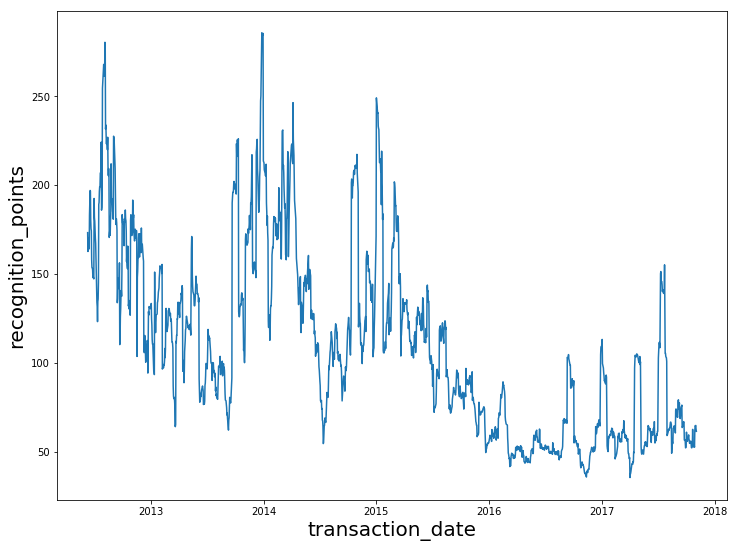

In [45]:
# using rolling window 
dftime1=dftime.groupby('transcation_date').mean()
dftime2=dftime1.rolling(window=20).mean()  # using rolling window to check data trend
plt.figure(figsize=(12,9))
plt.plot(dftime2.index,dftime2['recognition_point'])       # there are seasonal signal 
plt.xlabel('transaction_date',size=20)
plt.ylabel('recognition_points',size=20)
plt.savefig('transaction_date')

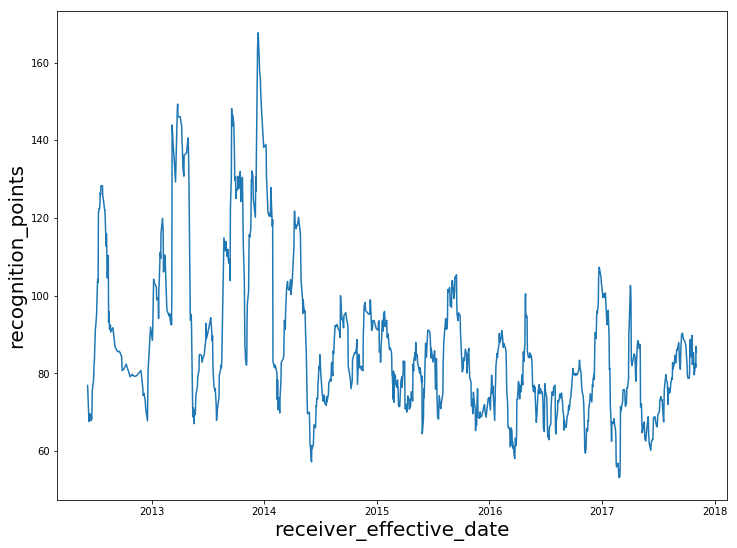

In [46]:
# check whether data is related with "receiver data"
dftime1=dftime.groupby('receiver_date').mean()
dftime2=dftime1.rolling(window=20).mean()
plt.figure(figsize=(12,9))
plt.plot(dftime2.index,dftime2['recognition_point'])  
plt.xlabel('receiver_effective_date',size=20)
plt.ylabel('recognition_points',size=20)
plt.savefig('receiver_date.png')

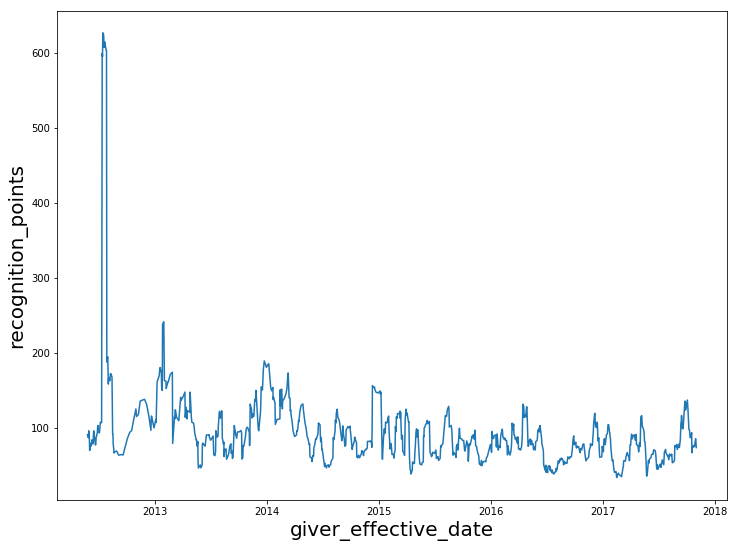

In [47]:
dftime1=dftime.groupby('giver_date').mean()
dftime2=dftime1.rolling(window=10).mean()
plt.figure(figsize=(12,9))
plt.plot(dftime2.index,dftime2['recognition_point'])  # there is an peak on beinging and end of every year,specially on 2014
plt.xlabel('giver_effective_date',size=20)
plt.ylabel('recognition_points',size=20)
plt.savefig('giver_eff_date.png')

## conclusion: The "recognition_points" is related with date time. 
### 1,As shown on top 3 plot, the "recognition_points_US" have periodcal signal: at the begining and ending of each year;  
### 2, The "recognition_point_US" of 2012,2013,and 2013 is much larger than later years';
### 3, For "giver_effictive_date" plot, there is obviously monthly signal shown up. 

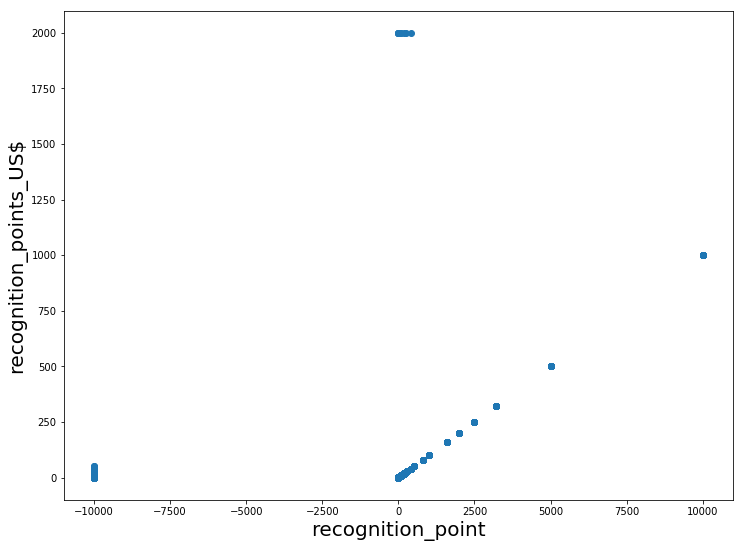

In [48]:
# check if recognition_points is related with recognition_point_US$
plt.figure(figsize=(12,9))
plt.scatter(df['recognition_points'],df['recognition_points_US$'])
plt.xlabel('recognition_point',size=20)
plt.ylabel('recognition_points_US$',size=20) # the data is linear correlated except point of 2000(recognition_points_US)
plt.savefig('recog_point_US$.png')

###  The "recognition_point" and "recognition_points_US" is linear related. so can drop "recognition_points" column

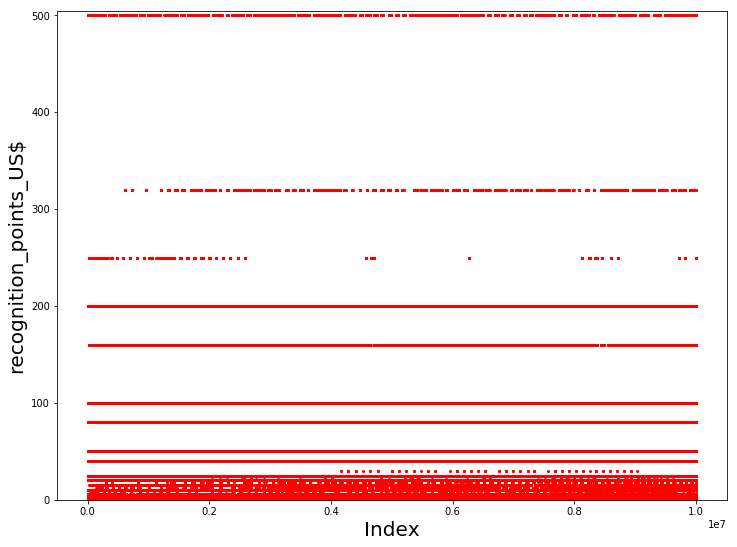

In [49]:
# check the distribution of "recognition_points "
plt.figure(figsize=(12,9))
plt.scatter(df.index,df['recognition_points_US$'],s=4, c='r')
plt.xlabel('Index',size=20)
plt.ylabel('recognition_points_US$',size=20)
plt.ylim(0,505);    
plt.savefig('recognition_points')


### the value of "recognition_point" belong categorical distribution, so using Decesion tree and cluster to build model 

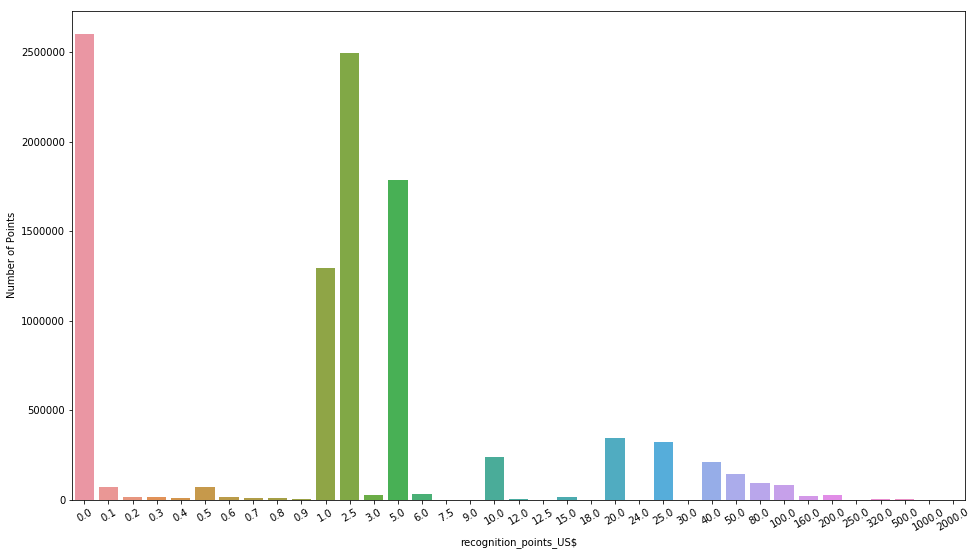

In [50]:
plt.figure(figsize=(16,9))
recog=df['recognition_points_US$'].value_counts()
recog_p=sns.barplot(x=recog.index,y=recog)
axe=recog_p.axes
xtick=list(map(lambda x:round(x,3),sorted(recog.index)))
axe.set_xticklabels(xtick,rotation=30)
axe.set_xlabel('recognition_points_US$')
axe.set_ylabel('Number of Points')
plt.savefig('recog_point.png')
plt.show()


### Majority of "recognition_point_US" is between 0 and 5;  and data is not Gaussian distribution

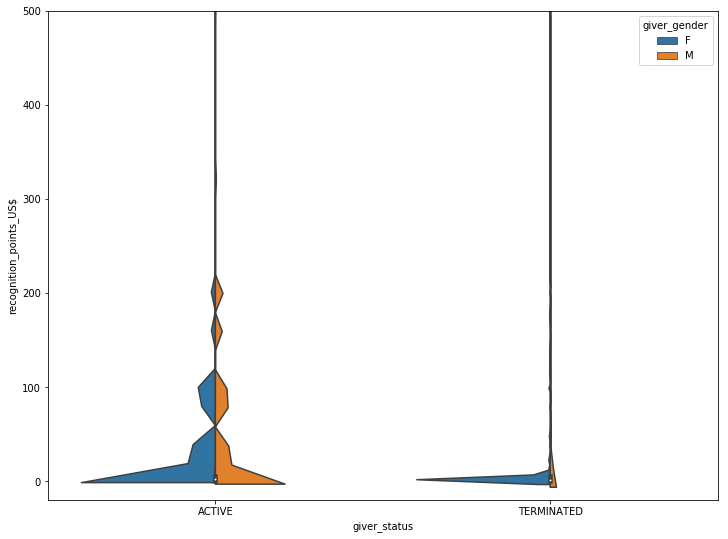

In [76]:
plt.figure(figsize=(12,9))
g_status=sns.violinplot(x='giver_status',y='recognition_points_US$',hue='giver_gender',
                        split=True,data=df)
g_status.set_ylim(-20,500)
plt.savefig('giver_status.png')

## For "giver_gender"
### 1, Number of "active" is much large than of "terminated";
### 2, For point of "recognition_point_US" is smaller than 130, the number of female is larger than of male;
### 3, For point of "recognition_point_US" is larger than 130, the number of male is larger than of female.

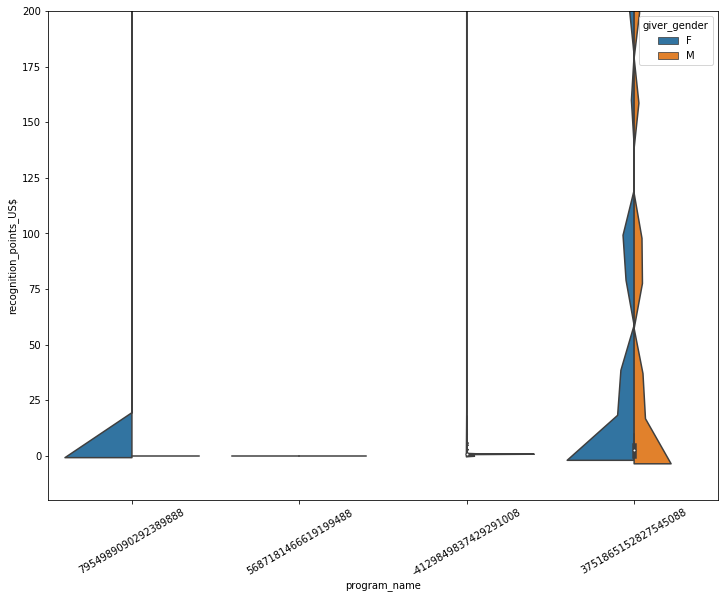

In [212]:
program=df['program_name'].value_counts();

plt.figure(figsize=(12,9))
program_plot=sns.violinplot(x='program_name',y='recognition_points_US$',
                            hue='giver_gender',split=True,data=df)
program_plot.set_xticklabels(program.index,rotation=30)
program_plot.set_ylim(-20,200)
plt.savefig('program_type.png')

## For giver_gender:
### The recognition_points of program 5687181466619199488 and -4129849837429291008 lay around 0;      

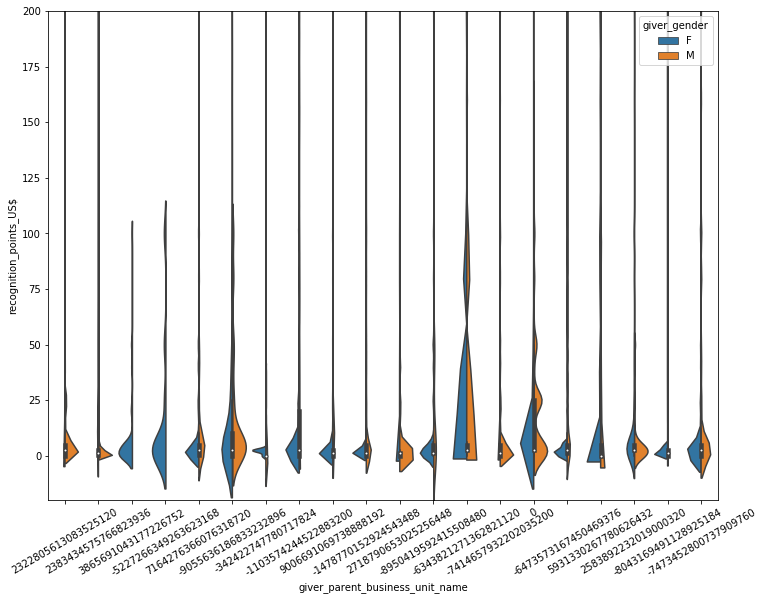

In [141]:
program=df['giver_parent_business_unit_name'].value_counts();

plt.figure(figsize=(12,9))
program_plot=sns.violinplot(x='giver_parent_business_unit_name',y='recognition_points_US$',
                            hue='giver_gender',data=df,split=True)
program_plot.set_xticklabels(program.index,rotation=30)
program_plot.set_ylim(-20,200)
plt.savefig('giver_parent_business_unit_name.png')

## For giver_gender:
### The giver_parent_business_unit: like 2322805613083525120, 2322805613083525120 et al., Majority is male
### The giver_parent_business_unit: like 3865691043177226752 and 0-5227266349263623168., Majority is female


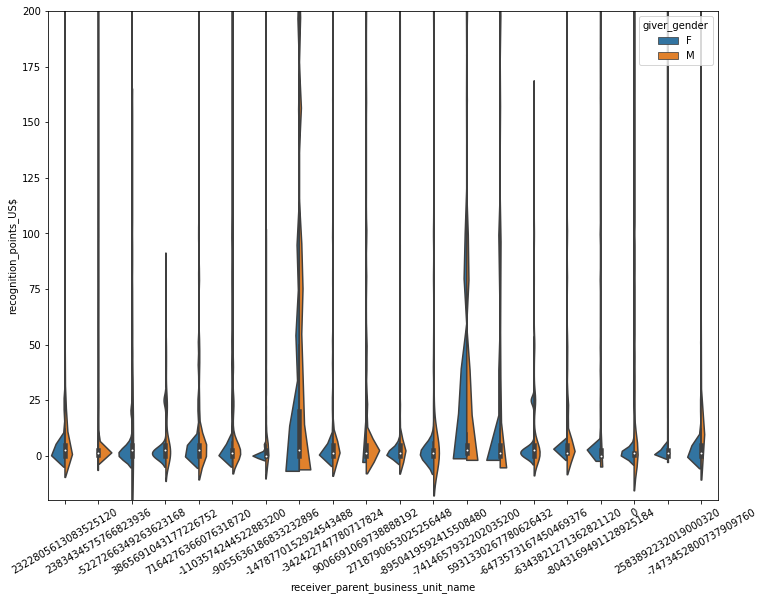

In [142]:
program=df['receiver_parent_business_unit_name'].value_counts();

plt.figure(figsize=(12,9))
program_plot=sns.violinplot(x='receiver_parent_business_unit_name',y='recognition_points_US$',
                            hue='giver_gender',data=df,split=True)
program_plot.set_xticklabels(program.index,rotation=30)
program_plot.set_ylim(-20,200)
plt.savefig('receiver_parent_business_unit_name.png')

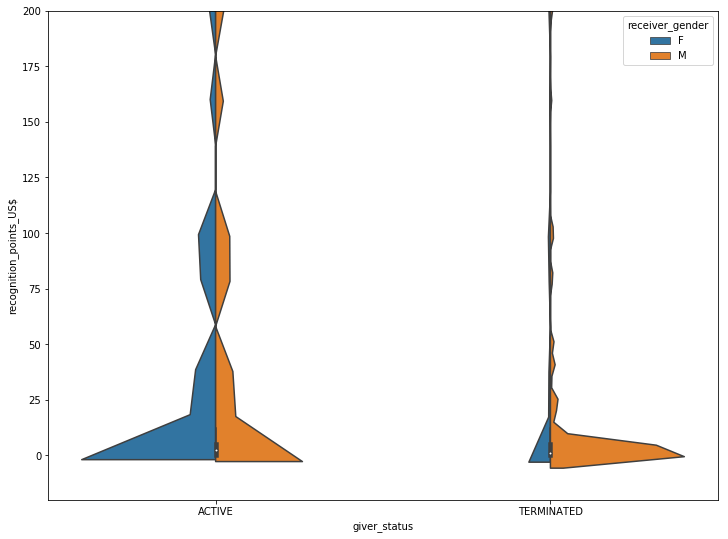

In [143]:
plt.figure(figsize=(12,9))
g_status=sns.violinplot(x='giver_status',y='recognition_points_US$',hue='receiver_gender',data=df,
                       split=True,hue_order=['F','M'])
g_status.set_ylim(-20,200)
plt.savefig('giver_status_rece_gender.png')

## For receiver_gender:
### for terminated status, The number of male is much larger than female. 

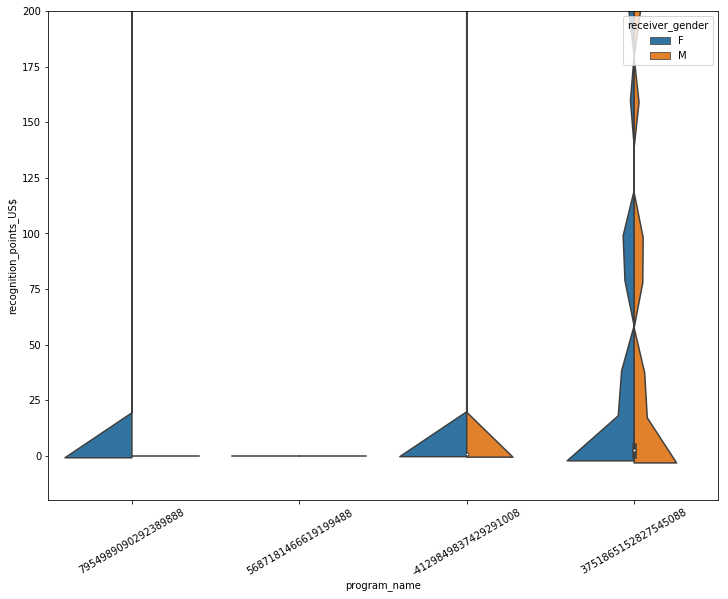

In [79]:
program=df['program_name'].value_counts();

plt.figure(figsize=(12,9))
program_plot=sns.violinplot(x='program_name',y='recognition_points_US$',
                            hue='receiver_gender',hue_order=['F','M'],data=df,split=True,size=3)
program_plot.set_xticklabels(program.index,rotation=30)
program_plot.set_ylim(-20,200)
plt.savefig('program_type_receiver_gender.png')

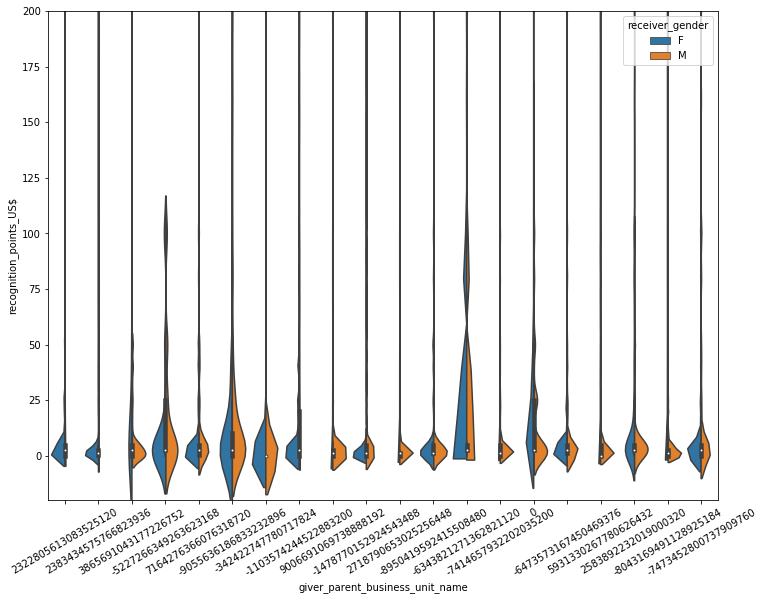

In [80]:
program=df['giver_parent_business_unit_name'].value_counts();

plt.figure(figsize=(12,9))
program_plot=sns.violinplot(x='giver_parent_business_unit_name',y='recognition_points_US$',
                            hue='receiver_gender',data=df,hue_order=['F','M'],split=True)
program_plot.set_xticklabels(program.index,rotation=30)
program_plot.set_ylim(-20,200)
plt.savefig('giver_parent_business_unit_name_receiver_gender.png')

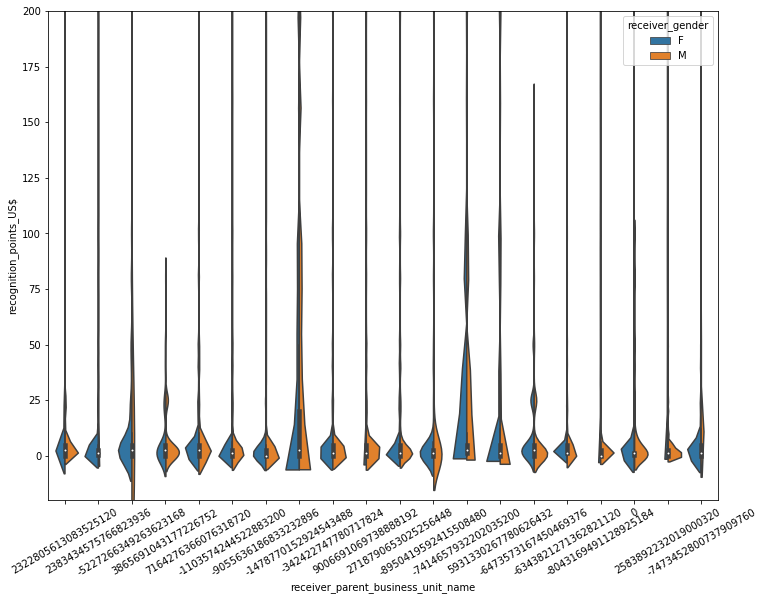

In [81]:
program=df['receiver_parent_business_unit_name'].value_counts();

plt.figure(figsize=(12,9))
program_plot=sns.violinplot(x='receiver_parent_business_unit_name',y='recognition_points_US$',
                            hue='receiver_gender',data=df,hue_order=['F','M'],split=True)
program_plot.set_xticklabels(program.index,rotation=30)
program_plot.set_ylim(-20,200)
plt.savefig('receiver_parent_business_unit_name_receiver_gender.png')

# summurize: 
### 1, drop the "recognition_points" since it's linear related with "reconnition_point_US"
### 2, the "recognition_points_US" have seasonal signal. There is a surge at begining and end of each year. 
### so convert "date" into Year, Month, Day to add more data feature
### 3, label the categorical data, like "gender" and "giver_status', also label other feature,  like business_name et al..
### 4, using unlinear model, since Y(recognition_point) is obviously categorical data 

In [82]:
df=df.drop(['recognition_points'],axis=1)

In [83]:
df.to_csv('OCT_clean.csv',sep=',')   # save data for late analysis